In [187]:
import elections
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [188]:
def get_election_df(election_year):
    """Get senate polling place data for given election year"""
    df_list = []
    electorate_list = ['Bass', 'Braddon', 'Clark', 'Franklin', 'Lyons']
    for electorate in electorate_list:
        try:
            df = elections.read_polling_place_data(electorate, election_year, remove_prepoll=True)
            df_list.append(df)
        except IndexError:
            print(f'no data for {electorate}')
    df = pd.concat(df_list)

    df['PollingPlaceRank'] = df['GreensPercentage'].rank(ascending=1, method='first')
    total_vote = (df['GreensVotes'].sum() / df['TotalVotes'].sum()) * 100
    df['GreensPercentageAnomaly'] = df['GreensPercentage'] - total_vote 
    df = df.sort_values(by=['PollingPlaceRank'])
    
    return df

In [189]:
df_2019 = get_election_df(2019)

In [190]:
df_2016 = get_election_df(2016)

In [191]:
df_2013 = get_election_df(2013)

In [192]:
df_2010 = get_election_df(2010)

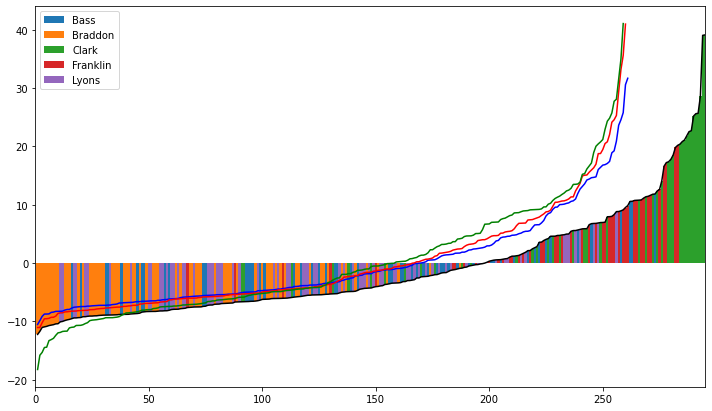

In [193]:
fig, ax = plt.subplots(figsize=(12, 7))
for electorate in electorate_list:
    xvals = df_2019[df_2019['DivisionNm'] == electorate]['GreensPercentageAnomaly'].values
    yvals = df_2019[df_2019['DivisionNm'] == electorate]['PollingPlaceRank'].values
    ax.bar(yvals, xvals, width=1.0, label=electorate)

plt.plot(df_2019['PollingPlaceRank'].values,
         df_2019['GreensPercentageAnomaly'].values, color='black')

plt.plot(df_2016['PollingPlaceRank'].values,
         df_2016['GreensPercentageAnomaly'].values, color='blue')

plt.plot(df_2013['PollingPlaceRank'].values,
         df_2013['GreensPercentageAnomaly'].values, color='red')

plt.plot(df_2010['PollingPlaceRank'].values,
         df_2010['GreensPercentageAnomaly'].values, color='green')

ax.set_xlim(0, len(df))
plt.legend()
plt.show()

In [159]:
#plt.figure(figsize=(20,8))
#ax = sns.barplot(x='PollingPlaceRank', y='GreensPercentageAnomaly',
#                 hue='DivisionNm', data=df, dodge=False)
#sns.lineplot(data=df, x='PollingPlaceRank', y="GreensPercentageAnomaly")
#ax.set(xlabel=None)
#ax.tick_params(bottom=False)
#ax.set(xticklabels=[]) 
#plt.show()

In [186]:
df_2016

,PollingPlaceNm,PremisesNm,Latitude,Longitude,LegCo,LocalCouncil,DivisionNm,TotalVotes,GreensVotes,GreensPercentage,PollingPlaceRank,GreensPercentageAnomaly
PollingPlaceID,,,,,,,,,,,,
8667,Savage River,Grange Resources Lodge,-41.511900,145.219000,Murchison,Waratah-Wynyard,Braddon,88.0,0.0,0.000000,1.0,-10.519464
8386,Irishtown,Irishtown Lodge Arthur Temple,-40.913300,145.145000,Murchison,Circular Head,Braddon,450.0,3.0,0.666667,2.0,-9.852797
8696,Zeehan,Zeehan Primary School,-41.888000,145.340000,Murchison,West Coast,Braddon,360.0,5.0,1.388889,3.0,-9.130575
8379,Forest,Forest Primary School,-40.848600,145.248000,Murchison,Circular Head,Braddon,447.0,8.0,1.789709,4.0,-8.729755
8641,Ouse,Ouse Online Centre,-42.485288,146.711018,Derwent,Central Highlands,Lyons,335.0,6.0,1.791045,5.0,-8.728419
...,...,...,...,...,...,...,...,...,...,...,...,...
94987,Prospect (Lyons),St Patrick's College,-41.472000,147.126000,Rosevears,Launceston City,NaN,NaN,NaN,NaN,NaN,NaN
11665,Prospect Vale,Residential Retirement Village Clubrooms,-41.478200,147.110000,Launceston,Meander Valley,NaN,NaN,NaN,NaN,NaN,NaN
8655,Richmond,Richmond Primary School,-42.739282,147.437988,Rumney,Clarence City,NaN,NaN,NaN,NaN,NaN,NaN


A bunch of electorates are NaN when they should have a DivisionNm...